# Using Data Science To Identify Confusion Amongst Python Programmers 

Today's Goal: Get started with data science workflows and tooling in a real-life scenario.

## It's a Typical Monday At Work And....

Harriet Human-Resources, the VP of Training and Interviewing, comes in and says 

> We need to figure out a better way to assess candidates for skills in particular programming languages.  We also need to make our internal training programs for teaching employees better.  The CTO says we're going to build most things in Python. 

> We’re going to put a team on these problems, but they need more information about how to .  I know you’re busy with 100 other things, but can you give us some insight at Friday’s meeting? Maybe after the meeting, we can have a talk about that raise you asked for.”

## What do you do?

For starters, you're going to set up this Jupyter notebook.  Hit `ESC` + `h` to see the Jupyter Help menu.

### Setting up the Worksheet

Put these at the top of every notebook, to get automatic reloading and inline plotting:

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## A Workflow For Thinking About the Problem And The Solution

....

## The Workflow

1. Identify the question you are trying to ask.
2. Identify and collect the data.
3. Explore the data.
4. Model data.
5. Communicate and visualize results.
6. Repeat various steps until you and/or a domain expert is satisfied.

## Step 1: Identify The Question
----------------------------------------

In which areas do Python programmers struggle the most?  

## Step 2: Identify and collect the data
------------------------------------------------

Stack Overflow has a lot of excellent data.  Say that you don't want to use their API for some reason.  So instead you're going to scrape their pages.  Go find the best pages for Python information and scrape them.

In [10]:
STACK_OVERFLOW_URL = "https://stackoverflow.com/questions/tagged/python?sort=votes&pageSize=15"

### The `requests` library

In [11]:
import requests

[Requests](http://docs.python-requests.org/en/master/) is a library that provides a pleasing API wrapper for HTTP requests, i.e., makes sending cumbersome-looking requests out of pleasing Python code.  Getting the text from a webpage is as simple as one line of code:

In [19]:
stack_overflow_response = requests.get(STACK_OVERFLOW_URL)

stack_overflow_html = stack_overflow_response.content

# print(stack_overflow_html)

However, this data is just a mass of text at this point.  It needs to be parsed into a usable data structure....

## Step 3: Explore the Data
----------------------------------

### The `BeautifulSoup` library

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/) is the most popular HTML parsing in the Python package ecosystem. You tell it which parsing engine you want it to use, feed in an HTML text file, and its top-level object returns a parsable data structure.

In [25]:
from bs4 import BeautifulSoup

In [27]:
PARSER = 'html.parser'

soup = BeautifulSoup(stack_overflow_html, PARSER)

# questions = soup.find_all("a", "question-hyperlink")
questions = soup.find_all("div", class_="question-summary")

# print(questions)

OK, so now we have an array of Beautiful Soup objects:

In [35]:
first_question = questions[0]

print('TYPE: ', type(first_question))
# print('-------------------------')
# print('DIR:')
# print(dir(first_question))
# print('-------------------------')
# print(questions[0])

TYPE:  <class 'bs4.element.Tag'>


Now use the `text` method on the Beautiful Soup Tag object to get the meat
of the data that you want:

In [22]:
for i in range(len(questions)):
    text = questions[i].find(class_='question-hyperlink').text
    votes = questions[i].find(class_='supernova')['title'].split(" ")[0].replace(',','')
    
    split_text = text.split(" ")
    
    for x in range(len(split_text)):
        row = (split_text[x], int(votes))
        dataset.append(row)

# print(dataset)

[('What', 1551636), ('does', 1551636), ('the', 1551636), ('“yield”', 1551636), ('keyword', 1551636), ('do?', 1551636), ('What', 554185), ('are', 554185), ('metaclasses', 554185), ('in', 554185), ('Python?', 554185), ('How', 2469775), ('do', 2469775), ('I', 2469775), ('check', 2469775), ('whether', 2469775), ('a', 2469775), ('file', 2469775), ('exists', 2469775), ('using', 2469775), ('Python?', 2469775), ('Does', 1163943), ('Python', 1163943), ('have', 1163943), ('a', 1163943), ('ternary', 1163943), ('conditional', 1163943), ('operator?', 1163943), ('What', 1456417), ('does', 1456417), ('if', 1456417), ('__name__', 1456417), ('==', 1456417), ('“__main__”:', 1456417), ('do?', 1456417), ('Calling', 2266313), ('an', 2266313), ('external', 2266313), ('command', 2266313), ('in', 2266313), ('Python', 2266313), ('How', 987013), ('to', 987013), ('merge', 987013), ('two', 987013), ('dictionaries', 987013), ('in', 987013), ('a', 987013), ('single', 987013), ('expression?', 987013), ('How', 155899

Normally I would extract 100s of pages of this data and put it in separate files.

But today, we're just looking for an in-memory example.  We will instead output it into a Python array.

In [8]:
import numpy as np
import pandas as pd

In [9]:
print(dataset)

NameError: name 'dataset' is not defined

In [8]:
# Use this code if I want to switch between files.

# with open('data.txt', 'r') as f:
#     res = f.readlines()

# res = [x.split(" ") for x in [y.strip() for y in res]]

# flattened_res = [item for sublist in res for item in sublist]


Stick it in an ndarray.



### `ndarray` -- n-dimensions of your data.

So this data looks like it has two dimensions - the number of votes you have and all of the text. Let's separate that out with some simple Python.

### Pandas Dataframes

In [108]:
df = pd.DataFrame(dataset, columns=["votes", "word"], dtypes=['string', 'float64'])
print(df)

TypeError: __init__() got an unexpected keyword argument 'dtypes'

In [107]:
df2 = df.groupby(by='word').mean()
# print(df.columns)

DataError: No numeric types to aggregate

In [106]:
print(df2)

### Pandas DataFrames

## Step 4: Model The Data
---------------------------------

## Step 5: Visualize and Communicate The Data
------------------------------------------------------------

In [7]:
import matplotlib.pyplot as plt

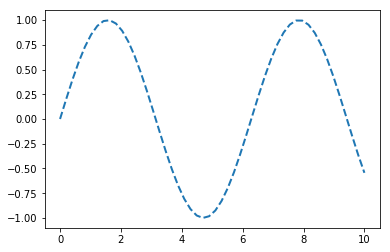

In [39]:
x = np.linspace(0,10)
line, = plt.plot(x, np.sin(x), '--', linewidth=2)

## Step 6: Repeat As Necessary

## Appendix A: Resources